# Prever Chances de Admissão no Mestrado com Regressão Linear

Criar um modelo de regressão linear capaz de prever as chances de admissão de um aluno em uma universidade, dadas algumas características.

Dataset: https://www.apb.ucla.edu/campus-statistics/common-data-set

#### Descrição:
 O conjunto de dados contém vários parâmetros que são considerados importantes durante a inscrição nos Programas de Mestrado. 

- Pontuações GRE (GRE Score até 340) 
- Pontuações do TOEFL (TOEFL Score até 120) 
- Classificação da universidade (University Rating até 5) 
- Declaração de objetivo (SOP até 5) 
- Força da carta de recomendação (LOR até 5) 
- Graduação GPA (CGPA até 10) 
- Experiência em pesquisa (Research 0 ou 1) 
- Chance de admissão (Chance of Admit variando de 0 a 1) - variável alvo

In [16]:
# Carregar pacotes
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Separando variáveis numéricas e categóricas

# Normalizando as variáveis numércas
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA'] ].values / 100 

# Coletando a variável categórica
categorical_research_features = data[ [ 'Research' ] ].values 

In [5]:
# Concatenando as variáveis de entrada em X
X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )

# Variável resposta em Y
Y = data[ [ 'Chance of Admit' ] ].values

In [6]:
# Separando os dados em treino e teste
train_features, test_features, train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

In [7]:
# Convertendo os dados de treino e teste em tensores constantes e armazenando em X e Y

# treino
X_treino = tf.constant( train_features , dtype=tf.float32 )
Y_treino = tf.constant( train_labels , dtype=tf.float32 ) 
                  
# teste
X_teste = tf.constant( test_features , dtype=tf.float32 ) 
Y_teste = tf.constant( test_labels , dtype=tf.float32 ) 

## Funções para  modelo

In [8]:
# Função para calcular o erro quadrado médio
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

In [9]:
# Função para calcular a derivada do erro
def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )

In [10]:
# Função para calcular a hipótese (aproximação da função alvo)
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

## Inicializar hiperparâmetros

In [26]:
num_epochs = 10
num_samples = X_treino.shape[0]
batch_size = 20
learning_rate = 0.001

num_features = X_treino.shape[1]

In [27]:
# Inicializando os pesos com valores aleartórios
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

In [28]:
# Coletando amostras dos dados para o treinamento e criando um iterador
dataset = tf.data.Dataset.from_tensor_slices(( X_treino , Y_treino )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [29]:
## Construir o modelo
print('\nIniciando o Treinamento:')

# Loop para o treinamento
for i in range( num_epochs ) :
    
    epoch_loss = list()

    for b in range( int(num_samples/batch_size) ):

        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output )
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 

    
    print( 'A taxa de erro é igual a {}'.format( loss ) ) 


Iniciando o Treinamento:
A taxa de erro é igual a 5.261605262756348
A taxa de erro é igual a 3.668856382369995
A taxa de erro é igual a 2.569296360015869
A taxa de erro é igual a 1.809973120689392
A taxa de erro é igual a 1.285439133644104
A taxa de erro é igual a 0.9242965579032898
A taxa de erro é igual a 0.6758390665054321
A taxa de erro é igual a 0.5049729943275452
A taxa de erro é igual a 0.3880172669887543
A taxa de erro é igual a 0.3078174889087677


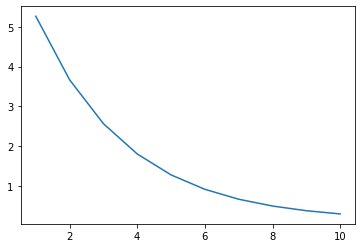

In [30]:
# Plot do resultado do treino
plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [31]:
# Gera previsões com os dados de teste
output = h( X_teste , weights , bias ) 
labels = Y_teste

In [32]:
# Calcula a acurácia
accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( '\nMean Absolute Error (MAE) = {}'.format( accuracy_op.result().numpy() ) )
print('\n')


Mean Absolute Error (MAE) = 0.4232807159423828




In [33]:
print('\nUm estudante com as características abaixo:')
tf.print(X_teste[0,:])
print('\nTeria o seguinte percentual de ser admitido na Universidade:')
tf.print(Y_teste[0] * 100)
print('\n')


Um estudante com as características abaixo:
[3.07 1.05 0.02 ... 0.045 0.0812 1]

Teria o seguinte percentual de ser admitido na Universidade:
[67]


